# Part 1 - Image Processing and Statistics

Importing libraries ...

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import convertapi as convertapi
from scipy.signal import convolve2d
import glob

Functions ...

In [2]:
    def load_image(img_url):
        img = mpimg.imread(img_url)
        img = img.astype(np.uint8)
        return img
    
    def crop_image(img, x):
        img_crop = img[0:x, :]
        return img_crop
    
    def hist256(imgint8):
        hist = np.zeros(256)
        for cnt in range(256):
            hist[cnt] = np.sum(imgint8 == cnt)
        return (hist)

    def threshold(imgINT, ath):
        imgTH = np.zeros(imgINT.shape)
        imgTH[imgINT >= ath] = 255
        imgTH[imgINT <= ath] = 0
        return imgTH.astype(np.uint8)
    
    def contrast(imgInt, a):
        imgInt_contrast = crop_level(imgInt.astype(np.float64) * a)
        return imgInt_contrast.astype(np.uint8)
    
    def crop_level(imgInt):
        imgInt[imgInt <= 0] = 0
        imgInt[imgInt >= 255] = 255
        return imgInt.astype(np.uint8)
    def filter_image(I,H):   
    # Convolution-based filtering: 
        Filtered = conv2(np.double(I),np.double(H));    
    # Reducing to original size and converting back to uint8: 
    # and CUT to the range between 0 and 255.
        return (crop_levels(Filtered)).astype(np.uint8)
    def conv2(x, y, mode='same'):
    # mimic matlab's conv2 function: 
        return np.rot90(convolve2d(np.rot90(x, 2), np.rot90(y, 2), mode=mode), 2)
    
    def median_filter(imgINT, radius):
        padded = np.pad(imgINT, ((radius, radius), (radius, radius)), 'reflect').astype(np.float64)
        N, M = imgINT.shape
        filtered = np.zeros(imgINT.shape)
        for cntN in range(N):
            for cntM in range(M):
                pidN = cntN+radius
                pidM = cntM+radius
                filtered[cntN,cntM] = np.floor(np.median(padded[pidN-radius:pidN+radius+1, pidM-radius:pidM+radius+1]))
        return filtered.astype(np.uint8)




Converting images to TIFF

In [3]:
# for file in glob.glob('OIP_FP_G8/Image/*.tif'):
#     convertapi.api_secret = 'TYXjhNKwfWEAYbks'
#     #image_n.append(file)
#     img=convertapi.convert('tiff', { 'File': file })
#     img.file.save('OIP_FP_G8/Image2')

Importing image and cropping...


In [4]:
img_l=[]
img_dic={}
for file in glob.glob('Image/*.tiff'):
    img_l.append(file[6:])
    img=load_image(file)
    img=crop_image(img,650)
    img_dic[file[6:]]=img

Plotting histogram ... 

In [5]:
#hist = hist256(img_dic[1])
#plt.plot(hist)
#plt.xlim([160,255])
#plt.ylim([0,2000])
#plt.imshow(img_dic.values()[1],cmap="gray")
#plt.show()


In [6]:
# px=[]
# for x in img_dic[5p75m200k41]:
#     m = np.mean(x)
#     px.append(m)
    
# sx=[]
# for x in img_dic[5p75m200k41]:
#     s = np.std(x)
#     sx.append(s)
    
#print(px,sx)

#img1_t=threshold (img1, px1+3*sx1)

In [7]:
thresh_l = [161.40000000000002, 157.1, 160.62, 163.5, 157.70000000000002, 
            137.08, 130.28, 134.51999999999998, 122.36, 121.56, 116.82, 
            144.12, 166.42000000000002, 167.0, 328.4, 296.15, 221.7, 201.7, 
            198.8, 202.6, 192.5, 214.5, 201.6, 211.1, 214.5, 201.6, 211.1, 211.1, 
            206.0, 215.6, 205.2, 206.0, 139.3, 145.07, 143.7, 127.51, 150.695, 138.025, 
            161.79, 157.106, 156.442, 142.909, 149.525, 146.33, 155.455, 164.766, 162.64, 
            153.2992, 144.654, 145.032, 135.914, 154.221, 147.32, 151.938, 151.455, 
            146.045]
print(len(thresh_l))

56


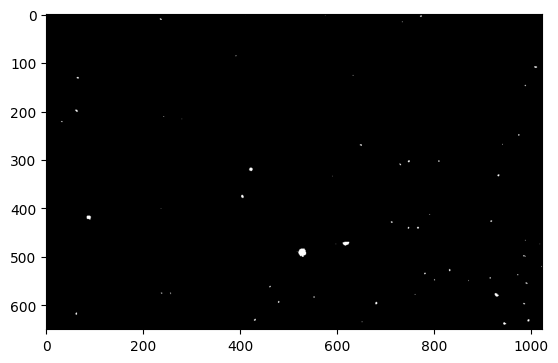

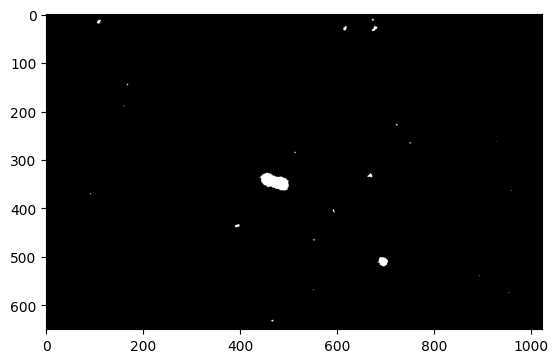

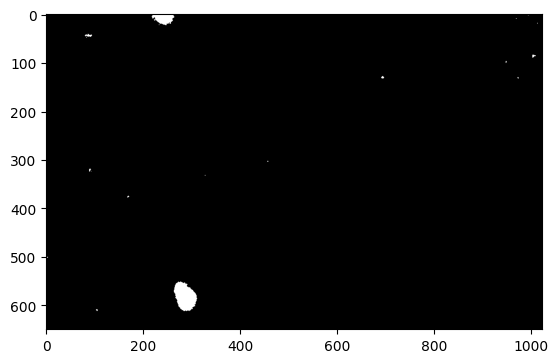

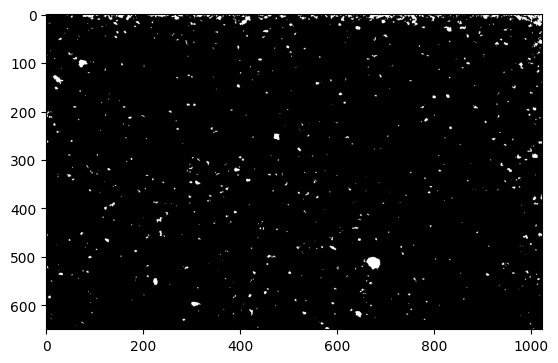

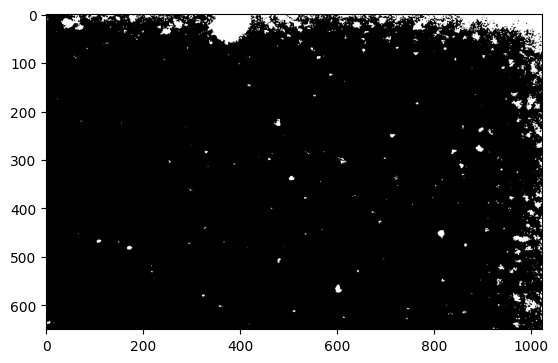

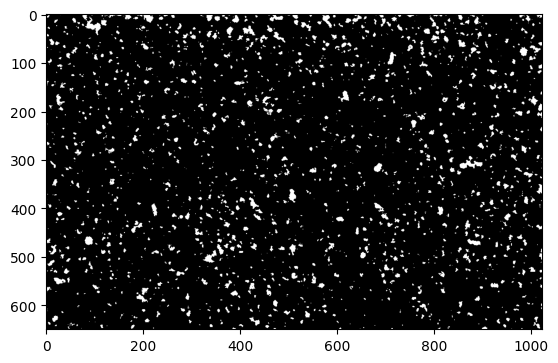

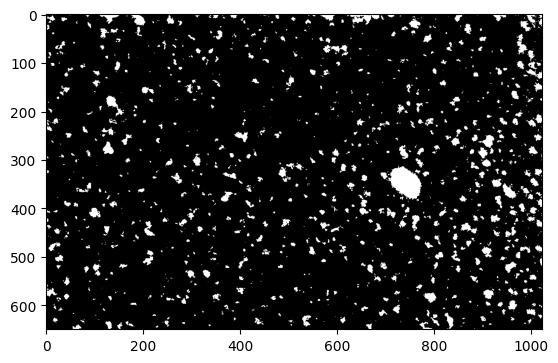

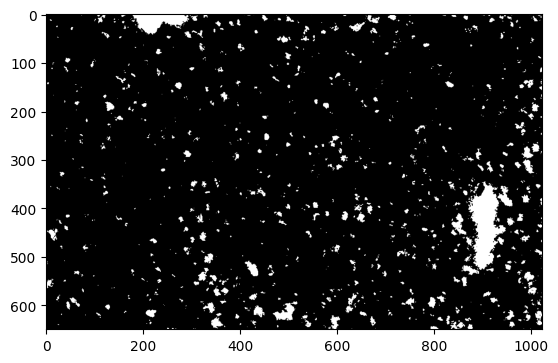

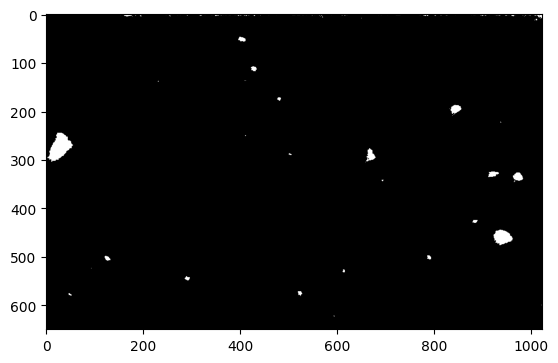

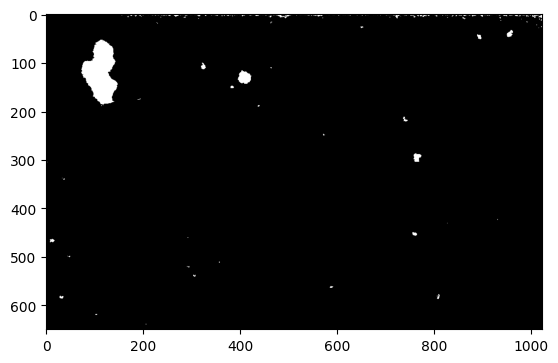

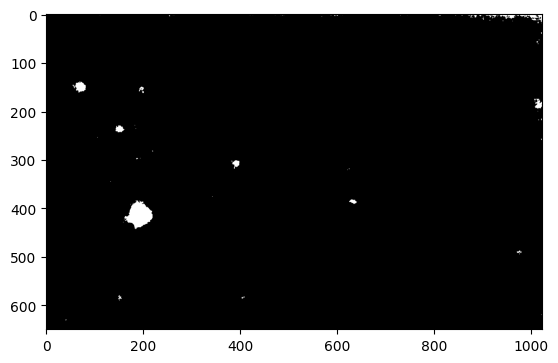

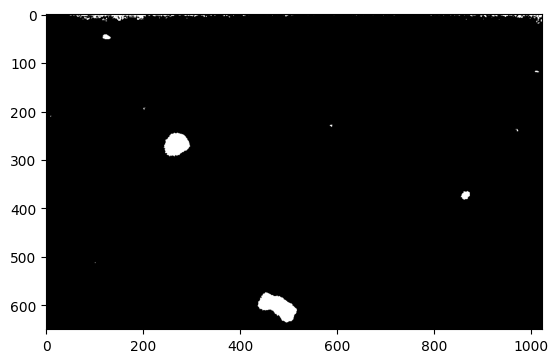

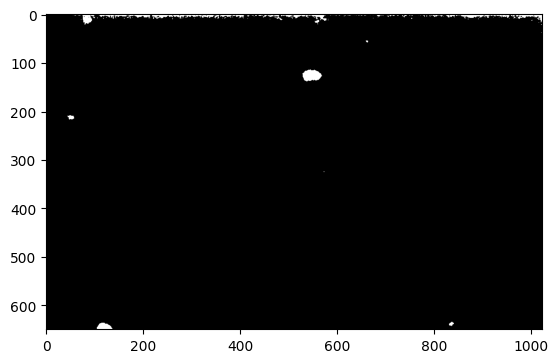

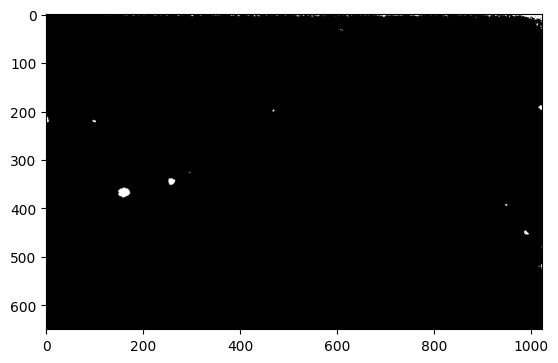

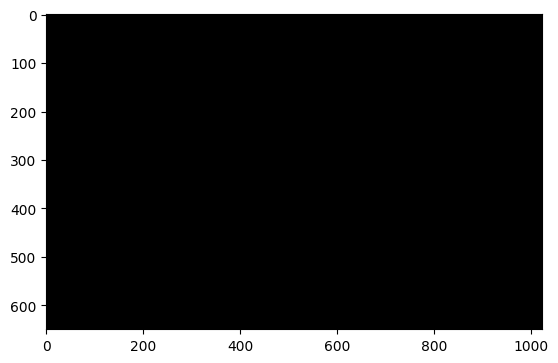

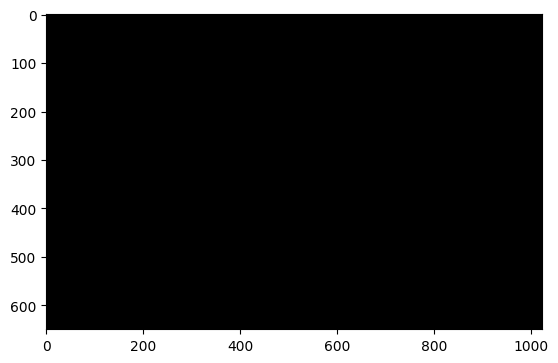

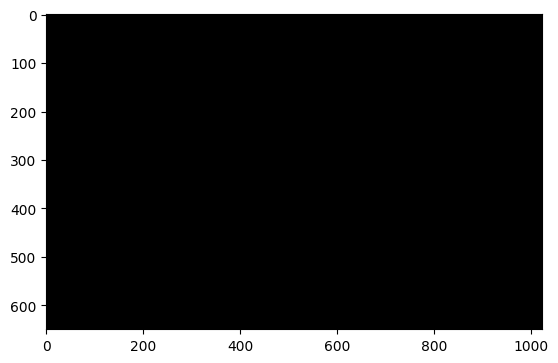

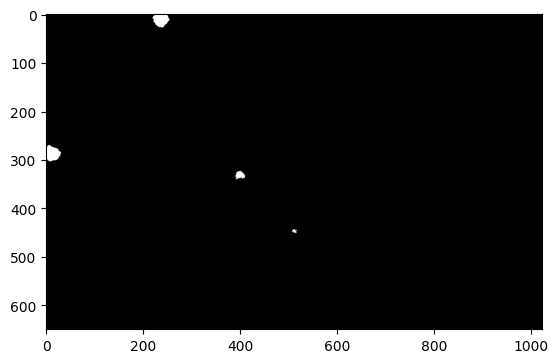

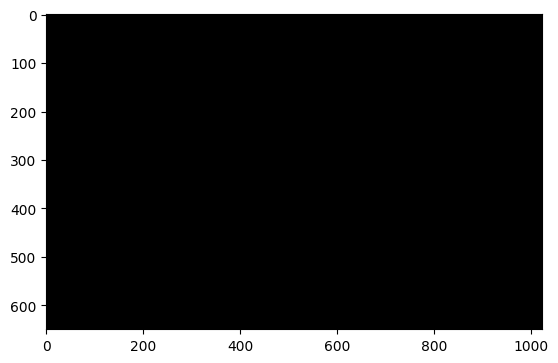

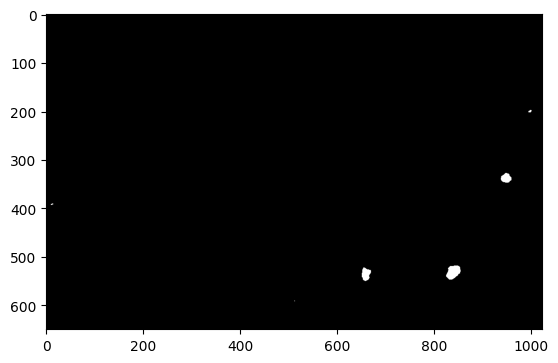

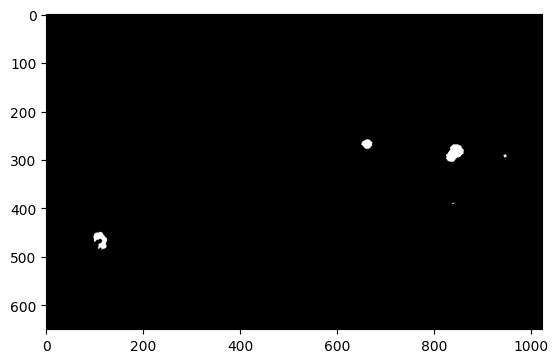

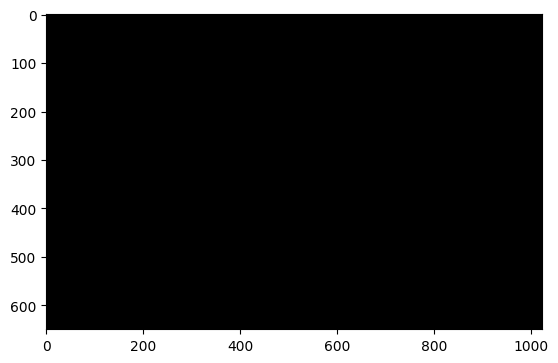

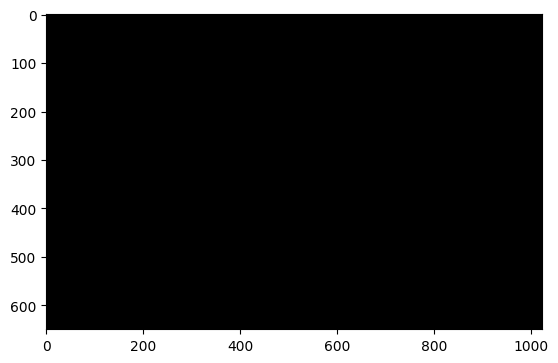

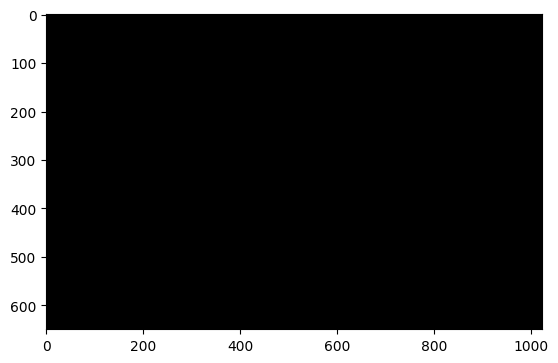

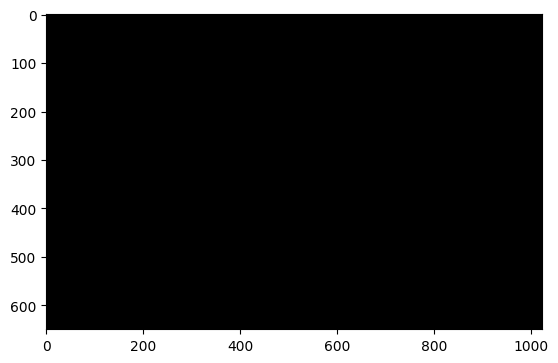

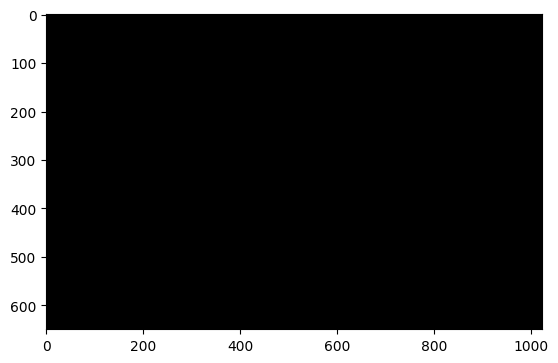

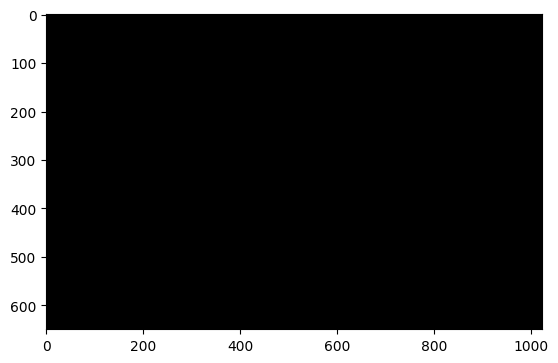

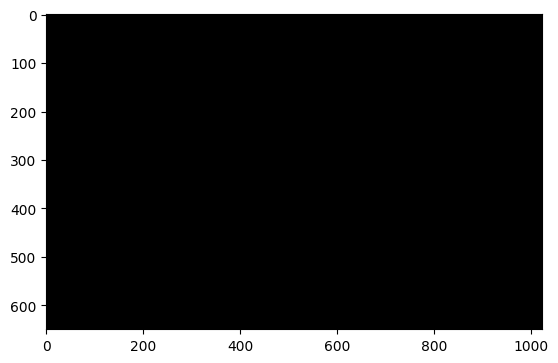

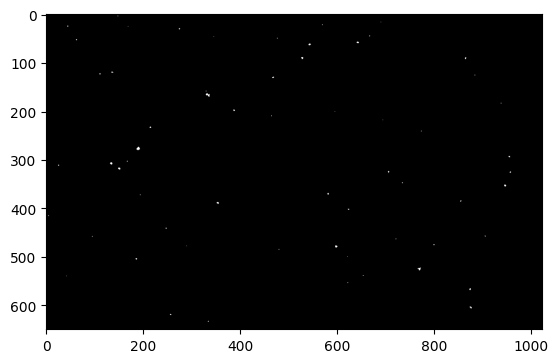

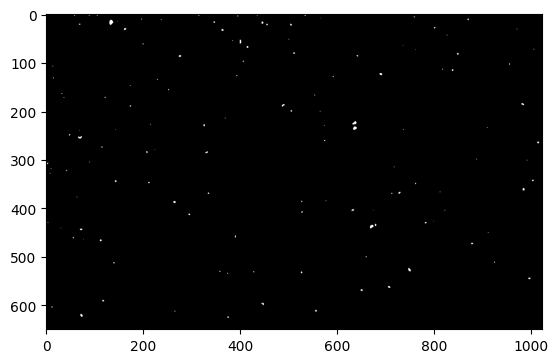

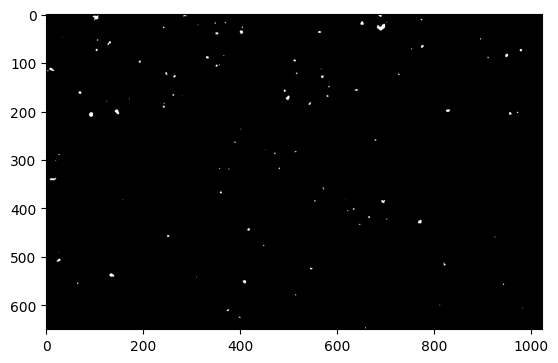

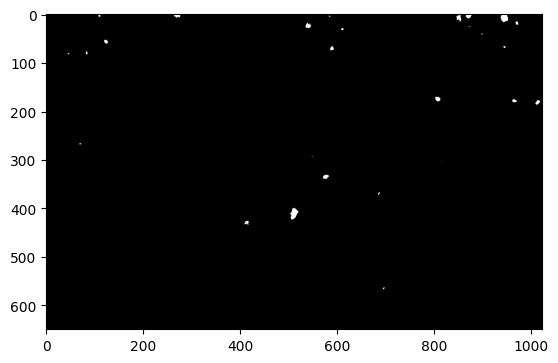

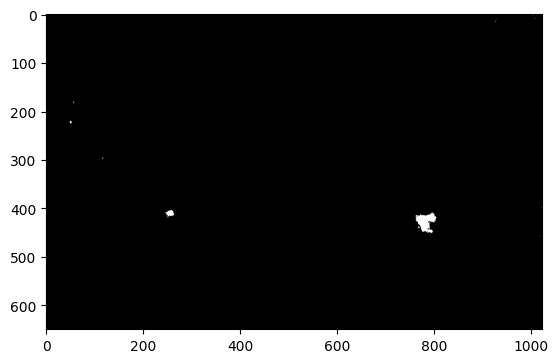

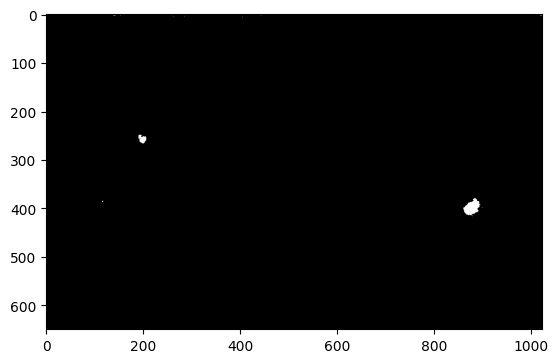

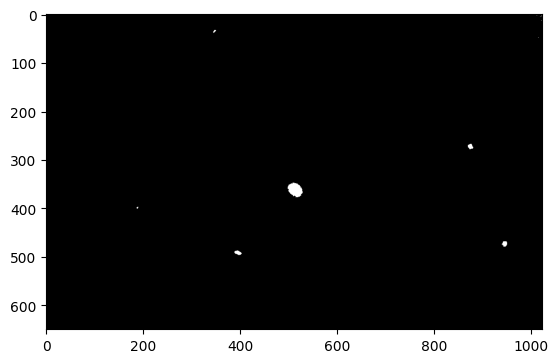

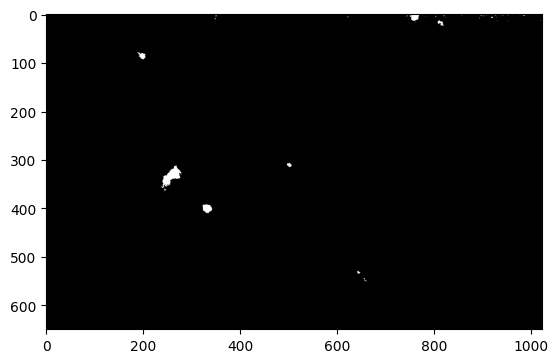

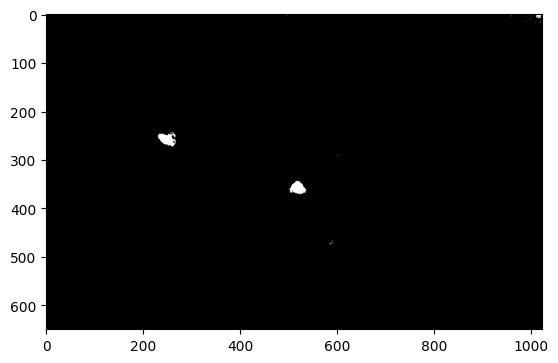

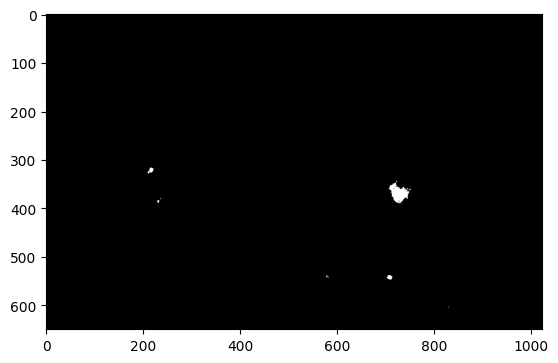

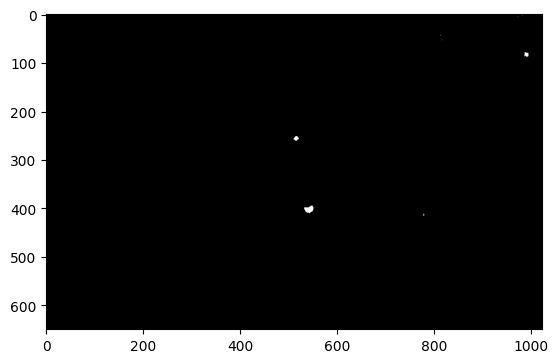

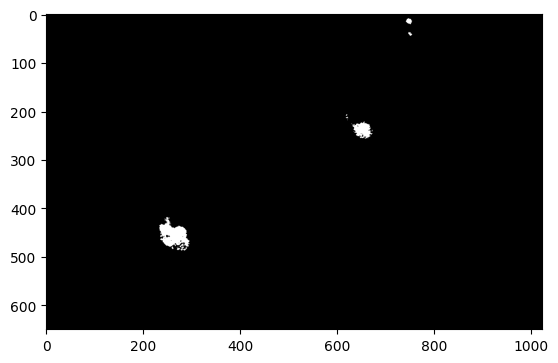

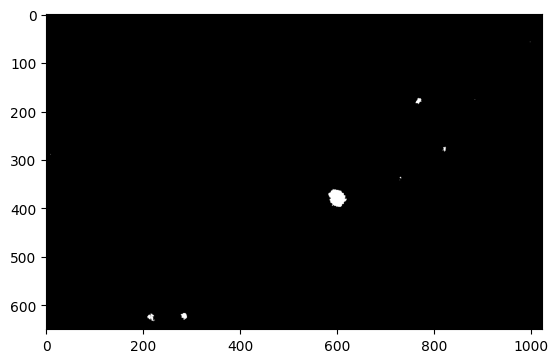

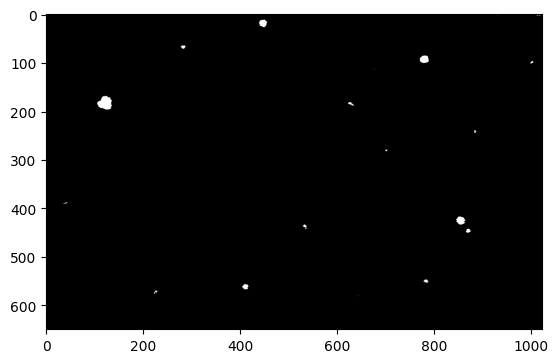

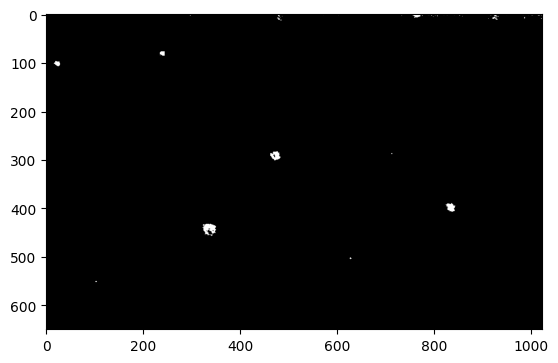

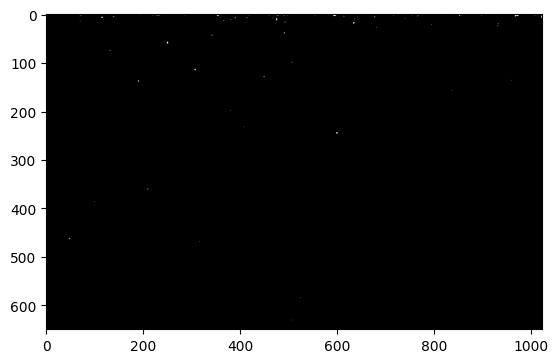

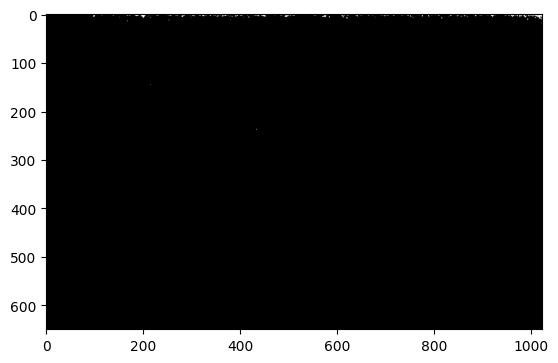

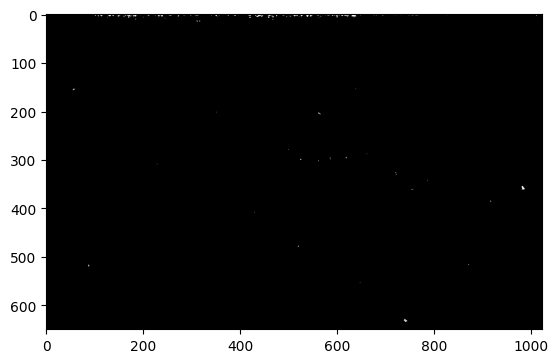

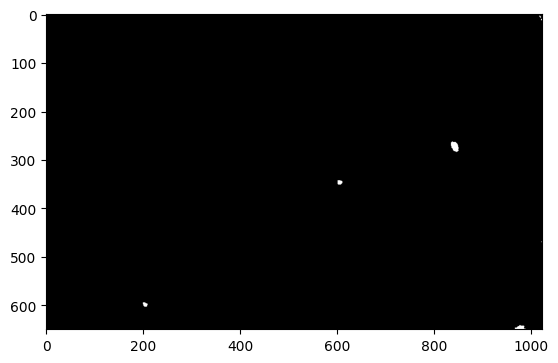

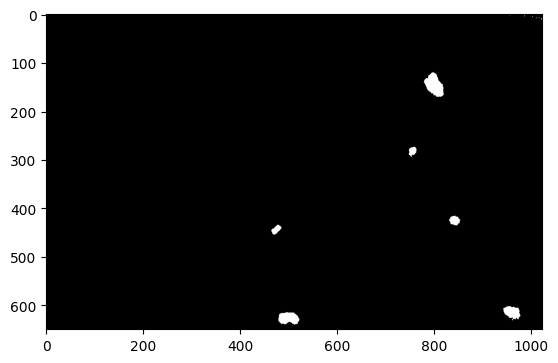

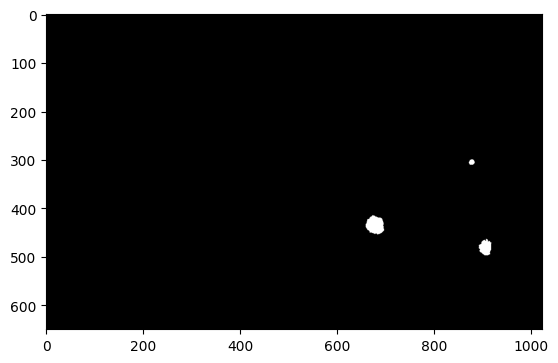

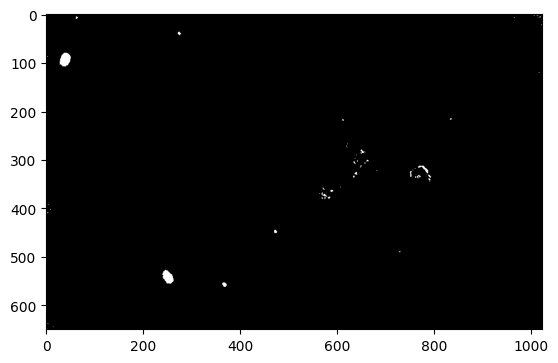

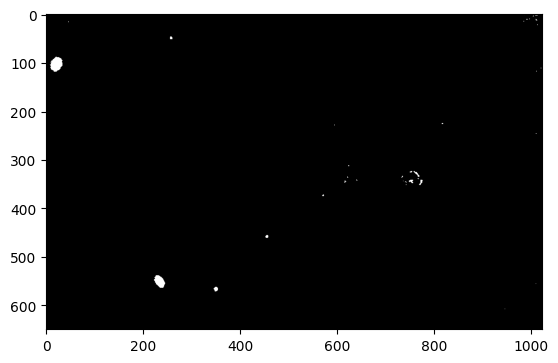

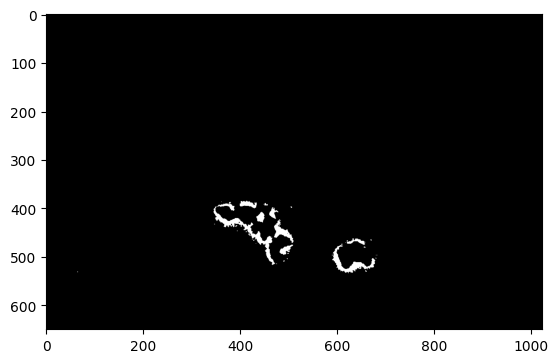

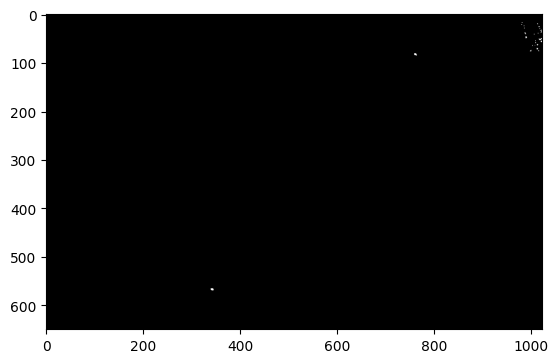

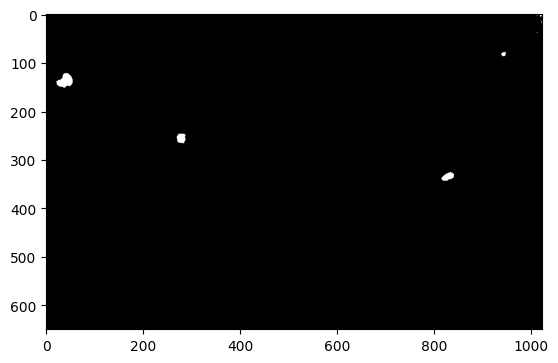

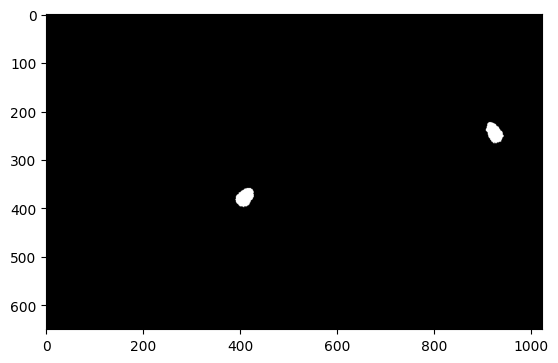

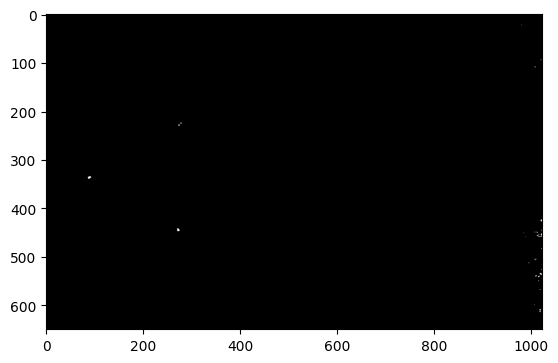

In [8]:
img_th=[]
for i in range(56):
    img_th.append(threshold (img_dic[img_l[i]], thresh_l[i]))
    #img_th[i] = img_th[i].reshape((*img_th[i].shape, 1))
    #img_t = img.astype(np.uint8)
    #print(img_th[i].shape)
    img_th[i]=median_filter(img_th[i],1)
#img_t=threshold(img_dic[img_l[0]], thresh_l[0])
    plt.imshow(img_th[i],cmap="gray")
    plt.show()

In [13]:
tot_p=img_th[1].shape[0]*img_th[1].shape[1]
sc=[]
for i in range(55):
    fg=np.sum(img_th[i]==255)
    sc.append(fg/tot_p*100)
    print("surface coverage 1=%2.2f"%sc[i],"%")


surface coverage 1=0.12 %
surface coverage 1=0.30 %
surface coverage 1=0.44 %
surface coverage 1=1.79 %
surface coverage 1=3.93 %
surface coverage 1=6.29 %
surface coverage 1=7.48 %
surface coverage 1=6.01 %
surface coverage 1=0.75 %
surface coverage 1=1.40 %
surface coverage 1=0.61 %
surface coverage 1=1.08 %
surface coverage 1=0.86 %
surface coverage 1=0.40 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.26 %
surface coverage 1=0.00 %
surface coverage 1=0.21 %
surface coverage 1=0.27 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.00 %
surface coverage 1=0.06 %
surface coverage 1=0.16 %
surface coverage 1=0.24 %
surface coverage 1=0.20 %
surface coverage 1=0.18 %
surface coverage 1=0.15 %
surface coverage 1=0.15 %
surface coverage 1=0.26 %
surface coverage 1=0.21 %
surface coverage 1=0.18 %
surface cove